Your task is to analyze survey data available at the following link: surveydata3.csv. The analysis includes estimating the mean with confidence intervals, standard error, minimum sample size for a specified precision, and estimating proportions.

- The data is loaded from the CSV file available at the following link: [surveydata3.csv](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3.csv).
- The dataset contains 753 rows and 55 columns, including various demographic and survey response variables.
- A detailed description of the dataset can be found [here](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3_description.csv).

**Instructions**

**Load the Data:**

- Load the data from the CSV file.
- Calculate the mean number of hours of sleep per night.
- Calculate the proportion of people who want to buy Udacity swag and prefer hoodies.

**Mean & Variance Estimation:**

- Calculate the mean and variance for the number of hours that Udemy students sleep per night.
- Calculate the confidence interval for the mean and variance.
- Calculate the standard error.
- Calculate the minimum sample size required to achieve a specified precision (e.g., 3%). 
- Visualize results with the boxplot (mean, std errors, confidence interval).

**Proportion Estimation:**

- Calculate the proportion for of people who want to buy Udacity swag and prefer hoodies :)
- Calculate the confidence interval for that proportion.
- Calculate the standard error.
- Calculate the minimum sample size required to achieve a specified precision (e.g., 3%).
- Visualize results with the boxplot (proportion, std errors, confidence interval).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/clean_surveydata3.xlsx?raw=true'
df = pd.read_excel(url, engine='openpyxl')
df.head()

,Index,reasons_study,age_years,sleep hours per night,commute_minutes,sitting hours per day,books per year,location,buy swag,item,...,study_hours_week,applied learned_hours per week,project_hours,advice,found Udacity,likely to recommend,improve experience,new to learn,anything else,share more info
0,0,NaN,32.0,NaN,NaN,NaN,NaN,China,1,hoodie,...,3,5,NaN,Set a schedule,Friend / word of mouth,10,Have weekly assignments,NaN,I love you guys!,NaN
1,1,NaN,38.0,NaN,NaN,NaN,NaN,Argentina,1,t-shirt,...,3,3,NaN,Don't be afraid to push the results of the pro...,Google,10,Nothing,NaN,Great survey!,NaN
2,2,Start a new career in this field,30.0,7.0,45.0,8.0,2.0,Canada,0,jacket (brand is TBD... probably Patagonia),...,20,15,15.0,work on it everyday,Google,8,more help working through the courses,SAS,NaN,NaN
3,3,General interest in the topic (personal growth...,37.0,7.0,30.0,5.0,10.0,India,1,t-shirt,...,5,6,7.0,Do not procrastinate. This is fun.,Google,10,Feature podcasts. More meetings with renowned ...,self-driving cars.,NaN,NaN
4,4,Start a new career in this field,24.0,8.0,65.0,0.0,45.0,Japan,0,backpack,...,2,1,1.0,NaN,Google,5,More in depth information and theory,"Advanced Deep learning, attention, and complex...",NaN,NaN


In [3]:
df.columns

Index(['Index', 'reasons_study', 'age_years', 'sleep hours per night',
       'commute_minutes', 'sitting hours per day', 'books per year',
       'location', 'buy swag', 'item', 'slogan/tagline', 'employed',
       'occupation', 'job level', 'industry', 'experience_years',
       'place of work', 'education level', 'Uprogramm', 'help tool',
       'study_hours_week', 'applied learned_hours per week', 'project_hours',
       'advice', 'found Udacity', 'likely to recommend', 'improve experience',
       'new to learn', 'anything else', 'share more info'],
      dtype='object')

In [12]:
df["buy swag"].isna().sum()

0

In [32]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan,
                        strategy="median")
sleep_data = df[["sleep hours per night"]]
sleep_data = imputer.fit_transform(sleep_data)
mean_hours_sleep = sleep_data.mean()

hoodie_swag_data = df[(df["item"]=="hoodie") & (df["buy swag"]==1)][["buy swag", "item"]]
proprotion_swag_hoodie = len(hoodie_swag_data) / len(df)

print(f"Mean = {mean_hours_sleep}\nProportion = {proprotion_swag_hoodie}")

Mean = 6.918990703851262
Proportion = 0.06640106241699867


In [33]:
hoodie_swag_data.head()

,buy swag,item
0,1,hoodie
15,1,hoodie
16,1,hoodie
17,1,hoodie
18,1,hoodie


In [34]:
from scipy import stats
sleep_mean = sleep_data.mean()
sleep_var = sleep_data.var()
sleep_std = sleep_data.std()

SE = sleep_std / np.sqrt(len(sleep_data))
print(f"Mean = {sleep_mean}")
print(f"SE = {SE}")
print(f"SE from scipy = {stats.sem(sleep_data)[0]}")
CI = stats.t.interval(0.95,
                      len(sleep_data)-1,
                      sleep_mean,
                      SE)
print(f"CI for the mean = {CI}")

Mean = 6.918990703851262
SE = 0.03583341027764097
SE from scipy = 0.035857227767992605
CI for the mean = (6.848645290550113, 6.98933611715241)


In [45]:
error = 0.03
n = (stats.t.ppf(0.975, df=len(sleep_data)-1)**2 * sleep_var) / (error**2)
print(f"Required sample size = {n}")

Required sample size = 4140.2259009995605


In [40]:
SE_p = np.sqrt((proprotion_swag_hoodie*(1-proprotion_swag_hoodie))/len(hoodie_swag_data))
CI_proprotion = stats.norm.interval(confidence=0.95,
                                    loc=proprotion_swag_hoodie,
                                    scale=SE_p)
print(f"CI for proportion = {CI_proprotion}")
print(f"SE = {SE_p}")

CI for proportion = (-0.002611917036336092, 0.13541404187033343)
SE = 0.03521135081955604


In [43]:
error = 0.03  
confidence_level = 0.95
p = proprotion_swag_hoodie

Z = stats.norm.ppf(1 - (1-confidence_level)/2)
minimum_n = (Z**2 * p * (1 - p)) / (error**2)
print(f"Minimum n = {minimum_n:.0f}")

Minimum n = 265


Z_score = 1.959963984540054


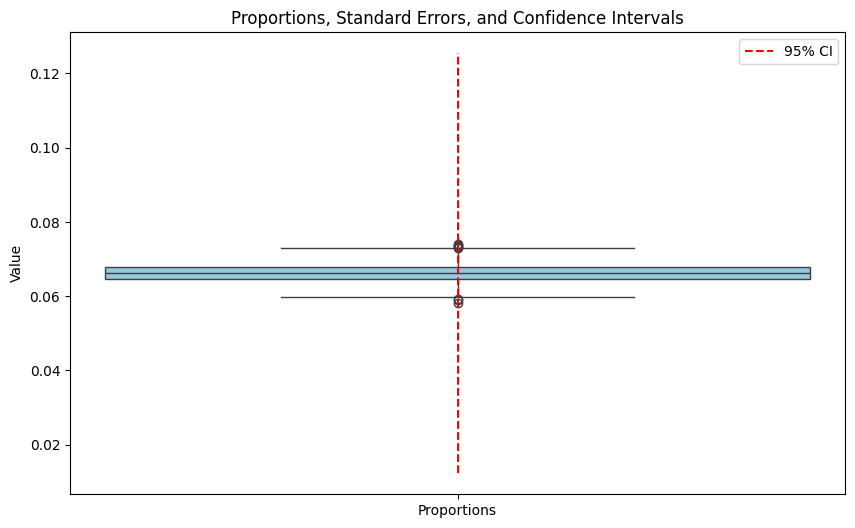

In [59]:
import seaborn as sns
n = 100
error_margin = 0.03 
confidence_level = 0.95

simulations = 1000
Z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
print(f"Z_score = {Z}")

proportions = []
standard_errors = []
lower_ci = []
upper_ci = []
np.random.seed(42)

# Simulate data
for _ in range(simulations):
    sample = np.random.binomial(n, p, size=n)
    prop = np.mean(sample) / n  # Proportion of successes
    SE = np.sqrt((prop * (1 - prop)) / n)  # Standard error
    ci_lower = prop - Z * SE  # Lower bound of confidence interval
    ci_upper = prop + Z * SE  # Upper bound of confidence interval
    
    proportions.append(prop)
    standard_errors.append(SE)
    lower_ci.append(ci_lower)
    upper_ci.append(ci_upper)

df = pd.DataFrame({
    'Proportion': proportions,
    'SE': standard_errors,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Proportion']], color='skyblue', width=0.3)
plt.plot([0, 0], [df['Lower CI'].min(), df['Upper CI'].max()], color='red', label='95% CI', linestyle='--')
plt.title('Proportions, Standard Errors, and Confidence Intervals')
plt.ylabel('Value')
plt.xticks([0], ['Proportions'])
plt.legend()
plt.show()